## Imports

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import json

plt.style.use('default')
from matplotlib import font_manager
font_prop = font_manager.FontProperties(family='fantasy')
legend_font_prop = font_manager.FontProperties(family='fantasy', size=14)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Comparison enviorment

### Generate random results

In [ ]:
def load_json(file_name):
  with open(file_name, 'r') as f:
    data = json.load(f)
    data['episode'] = len(data['runtime'])
    # change to minutes
    data['runtime'] = [round(sec/60, 2) for sec in data['runtime']]
    return data


In [ ]:
random_agent = load_json('/content/drive/MyDrive/minecraft proj/For comparison/stats_random.json')
bc_agent = load_json('/content/drive/MyDrive/minecraft proj/For comparison/stats_BC.json')
imi_agent = load_json('/content/drive/MyDrive/minecraft proj/For comparison/stats_imi_compare.json')
scripted_agent = load_json('/content/drive/MyDrive/minecraft proj/For comparison/stats_full_scripted.json')

### Compare

In [ ]:
colors = ['#b02e26', '#169c9d', '#825432', '#80c71f']
runtime = {}
reward = {}
for (c, agent, name) in [(colors[0], random_agent, 'random'), (colors[1], bc_agent, 'BC'), (colors[2], imi_agent, 'imitation'), (colors[3], scripted_agent, 'scripted')]:
  runtime[name] = {i + 1: agent['runtime'][i] for i in range(len(agent['runtime']))}
  reward[name] = {i + 1: agent['reward'][i] for i in range(len(agent['reward']))}

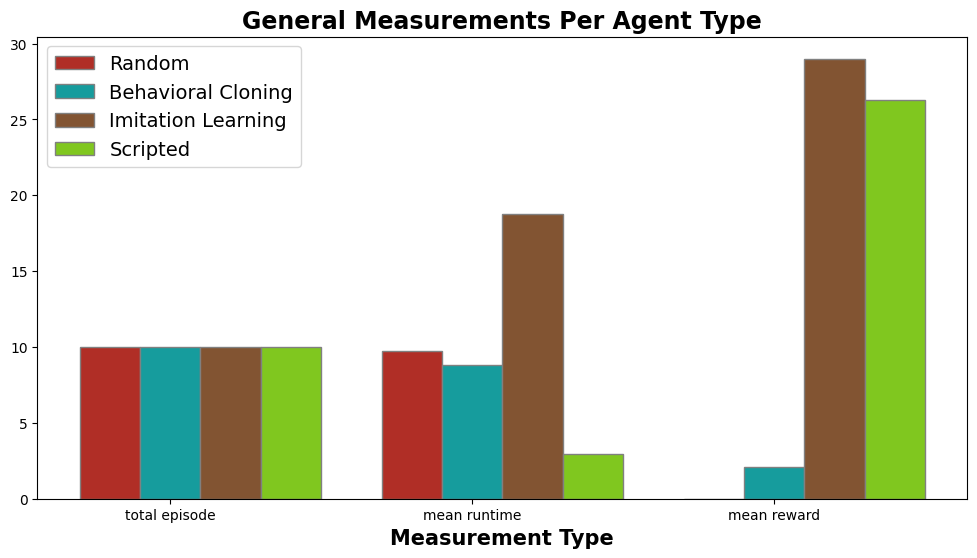

In [ ]:
# set width of bar
barWidth = 0.20
fig, ax = plt.subplots(figsize =(12, 6))

# set height of bar
random_stats = [np.mean(random_agent[i]) for i in ['episode', 'runtime','reward']]
bc_stats = [np.mean(bc_agent[i]) for i in ['episode', 'runtime','reward']]
imi_stats = [np.mean(imi_agent[i]) for i in ['episode', 'runtime','reward']]
scripted_stats = [np.mean(scripted_agent[i]) for i in ['episode', 'runtime','reward']]

# Set position of bar on X axis
br1 = np.arange(len(random_stats))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, random_stats, color=colors[0], width = barWidth,
		edgecolor ='grey', label ='Random')
plt.bar(br2, bc_stats, color=colors[1], width = barWidth,
		edgecolor ='grey', label ='Behavioral Cloning')
plt.bar(br3, imi_stats, color =colors[2], width = barWidth,
		edgecolor ='grey', label ='Imitation Learning')
plt.bar(br4, scripted_stats, color =colors[3], width = barWidth,
		edgecolor ='grey', label ='Scripted')

# Adding Xticks
plt.title('General Measurements Per Agent Type', fontweight ='bold', fontsize = 17)

plt.xlabel('Measurement Type', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(random_stats))],
		['total episode', 'mean runtime', 'mean reward'])

plt.legend(loc='upper left', prop={'size': 14})
plt.show()

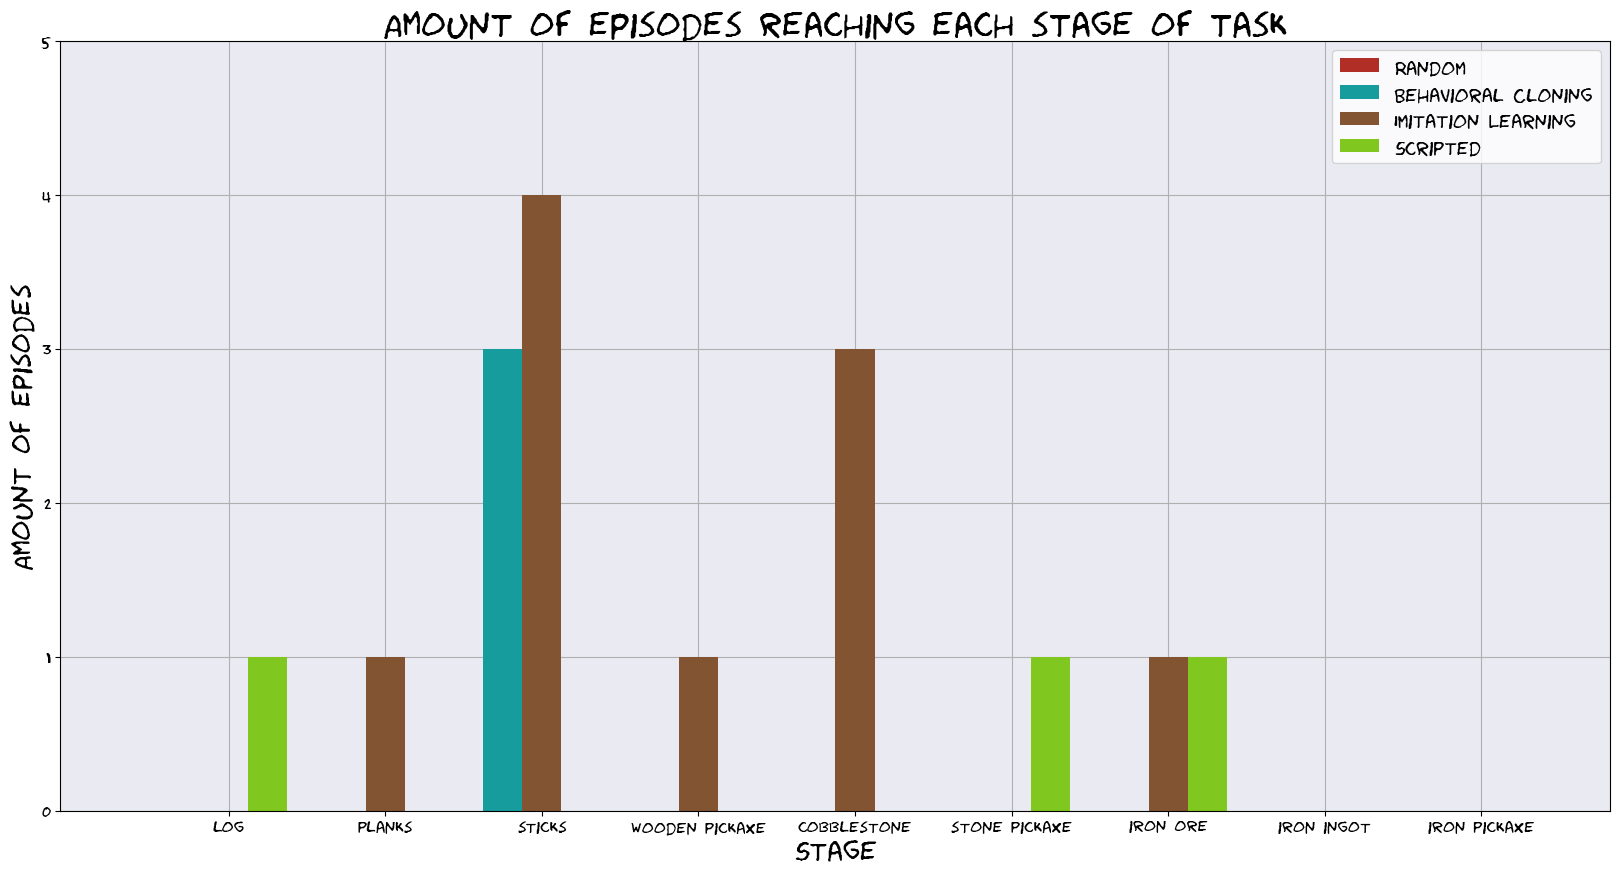

In [ ]:
from collections import Counter

barWidth = 0.25
x = np.array([1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0])
fig, ax = plt.subplots(figsize=(20,10))
for i, agent in enumerate([random_agent, bc_agent, imi_agent, scripted_agent]):
    agent_reward_step = agent['reward_at']
    c=Counter()
    # Iterate over each sublist in the given data
    for sublist in agent_reward_step:
        if sublist:
            c[sublist[-1][1]]+=1
        
    y=[c[i] for i in x]
    # x=[1.2,2.2,4.2,8.2,16.2,32.2]

# Plot the bar chart with colors based on the normalized reward values
    x_offset = i * barWidth
    plt.bar(np.arange(len(x)) + x_offset, y, color=colors[i], width=barWidth, label='Random' if i == 0 else 'Behavioral Cloning' if i == 1 else 'Imitation Learning' if i == 2 else 'Scripted')
    # plt.bar(x, y, label='Random' if agent == random_agent else 'Behavioral Cloning' if agent == bc_agent else 'Imitation Learning' if agent == imi_agent else 'Scripted')
plt.xlabel('Stage', size=20, fontproperties=font_prop)
plt.ylabel('Amount of episodes', size=20, fontproperties=font_prop)
plt.title('Amount of episodes reaching each stage of task', fontproperties=font_prop, size=25)
plt.xticks(np.arange(len(x)) + 2*barWidth, ['log', 'planks', 'sticks', 'wooden pickaxe', 'cobblestone', 'stone pickaxe', 'iron ore', 'iron ingot', 'iron pickaxe'], fontproperties=font_prop, size=12)
plt.yticks(np.arange(6.0), fontproperties=font_prop, size=12)
plt.legend(prop=legend_font_prop)

ax.set_facecolor('#EAEAF2')
ax.grid(True)
ax.set_axisbelow(True)

plt.show()

In [ ]:
random_agents_df = pd.DataFrame.from_dict(random_agent)
bc_df = pd.DataFrame.from_dict(bc_agent)
imi_df = pd.DataFrame.from_dict(imi_agent)
scripted_df = pd.DataFrame.from_dict(scripted_agent)

In [ ]:
random_agents_df.describe()

,runtime,reward,episode
count,10.000000,10.0,10.0
mean,9.747000,0.0,10.0
std,5.046537,0.0,0.0
min,3.120000,0.0,10.0
25%,5.325000,0.0,10.0
50%,10.285000,0.0,10.0
75%,13.572500,0.0,10.0
max,17.270000,0.0,10.0


In [ ]:
bc_df.describe()

,runtime,reward,episode
count,10.000000,10.000000,10.0
mean,8.787000,2.100000,10.0
std,5.829584,3.381321,0.0
min,1.580000,0.000000,10.0
25%,4.915000,0.000000,10.0
50%,6.510000,0.000000,10.0
75%,13.832500,5.250000,10.0
max,17.820000,7.000000,10.0


In [ ]:
imi_df.describe()

,runtime,reward,episode
count,10.000000,10.000000,10.0
mean,18.761000,29.000000,10.0
std,5.635326,38.099285,0.0
min,10.690000,3.000000,10.0
25%,14.827500,7.000000,10.0
50%,17.930000,15.000000,10.0
75%,23.135000,35.000000,10.0
max,26.950000,131.000000,10.0


In [ ]:
scripted_df.describe()

,runtime,reward,episode
count,10.000000,10.000000,10.0
mean,2.967000,26.300000,10.0
std,1.691522,57.207323,0.0
min,1.090000,0.000000,10.0
25%,1.332500,0.000000,10.0
50%,2.985000,0.000000,10.0
75%,4.380000,0.750000,10.0
max,5.070000,163.000000,10.0


In [ ]:
import pandas as pd

# Assuming you have the data in the following variables
agents_data = [
    {
        'name': 'Random',
        'episode_to_runtime': runtime['random'],  # Dictionary mapping episode to runtime for Agent 1
        'episode_to_total_reward': reward['random']  # Dictionary mapping episode to total reward for Agent 1
    },
    {
        'name': 'Behavioral Cloning',
        'episode_to_runtime': runtime['BC'],  # Dictionary mapping episode to runtime for Agent 2
        'episode_to_total_reward': reward['BC']  # Dictionary mapping episode to total reward for Agent 2
    },
    {
        'name': 'Imitation Learning',
        'episode_to_runtime': runtime['imitation'],  # Dictionary mapping episode to runtime for Agent 1
        'episode_to_total_reward': reward['imitation']  # Dictionary mapping episode to total reward for Agent 1
    },
    {
        'name': 'Scripted',
        'episode_to_runtime': runtime['scripted'],  # Dictionary mapping episode to runtime for Agent 2
        'episode_to_total_reward': reward['scripted']  # Dictionary mapping episode to total reward for Agent 2
    }
]

# Create a DataFrame for each agent
agent_dfs = []
for agent_data in agents_data:
    agent_name = agent_data['name']
    episode_to_runtime = agent_data['episode_to_runtime']
    episode_to_total_reward = agent_data['episode_to_total_reward']
    agent_df = pd.DataFrame({
        'Episode': list(episode_to_runtime.keys()),
        'Runtime': list(episode_to_runtime.values()),
        'Total Reward': list(episode_to_total_reward.values())
    })
    agent_df['Agent'] = agent_name
    agent_dfs.append(agent_df)

# Concatenate all agent DataFrames into a single DataFrame
combined_df = pd.concat(agent_dfs)

# Calculate the mean and standard deviation for each agent and metric
summary_df = combined_df.groupby('Agent').agg({
    'Runtime': lambda x: f"{x.mean():.2f} ± {x.std():.2f}",
    'Total Reward': lambda x: f"{x.mean():.2f} ± {x.std():.2f}"
}).reset_index()

# Print the summary table
print(summary_df)

                Agent       Runtime   Total Reward
0  Behavioral Cloning   8.79 ± 5.83    2.10 ± 3.38
1  Imitation Learning  18.76 ± 5.64  29.00 ± 38.10
2              Random   9.75 ± 5.05    0.00 ± 0.00
3            Scripted   2.97 ± 1.69  26.30 ± 57.21


In [ ]:
!unzip '/content/drive/MyDrive/minecraft proj/For comparison/minerl imgs.zip'

Archive:  /content/drive/MyDrive/minecraft proj/For comparison/minerl imgs.zip
  inflating: minerl imgs/8287159cc4065333242e159bcf24c205.png  
 extracting: minerl imgs/Crafting_Table_JE4_BE3.webp  
 extracting: minerl imgs/Furnace_29_JE4.webp  
 extracting: minerl imgs/Iron_Ore_JE6_BE4.webp  
 extracting: minerl imgs/Oak_Log_29_JE5_BE3.webp  
  inflating: minerl imgs/Oak_Planks_JE5.webp  
  inflating: minerl imgs/Stick_JE1_BE1.webp  
 extracting: minerl imgs/Stone_JE5_move.webp  
 extracting: minerl imgs/Stone_Pickaxe_JE2_BE2.webp  


In [ ]:
import matplotlib.image as image 
log = image.imread('/content/minerl imgs/Oak_Log_29_JE5_BE3.webp')
plank = image.imread('/content/minerl imgs/Oak_Planks_JE5.webp')
stick = image.imread('/content/minerl imgs/Stick_JE1_BE1.webp')
crafting = image.imread('/content/minerl imgs/Crafting_Table_JE4_BE3.webp')
wooden = image.imread('/content/minerl imgs/8287159cc4065333242e159bcf24c205.png')
cobble = image.imread('/content/minerl imgs/Stone_JE5_move.webp')
stone = image.imread('/content/minerl imgs/Stone_Pickaxe_JE2_BE2.webp')
furnace = image.imread('/content/minerl imgs/Furnace_29_JE4.webp')
iron = image.imread('/content/minerl imgs/Iron_Ore_JE6_BE4.webp')
id2pic = {1.0: log, 2.0: plank, 4.0: crafting, 5.0: stick, 8.0: wooden, 16.0: cobble, 32.0: stone, 33.0: furnace, 64.0: iron}

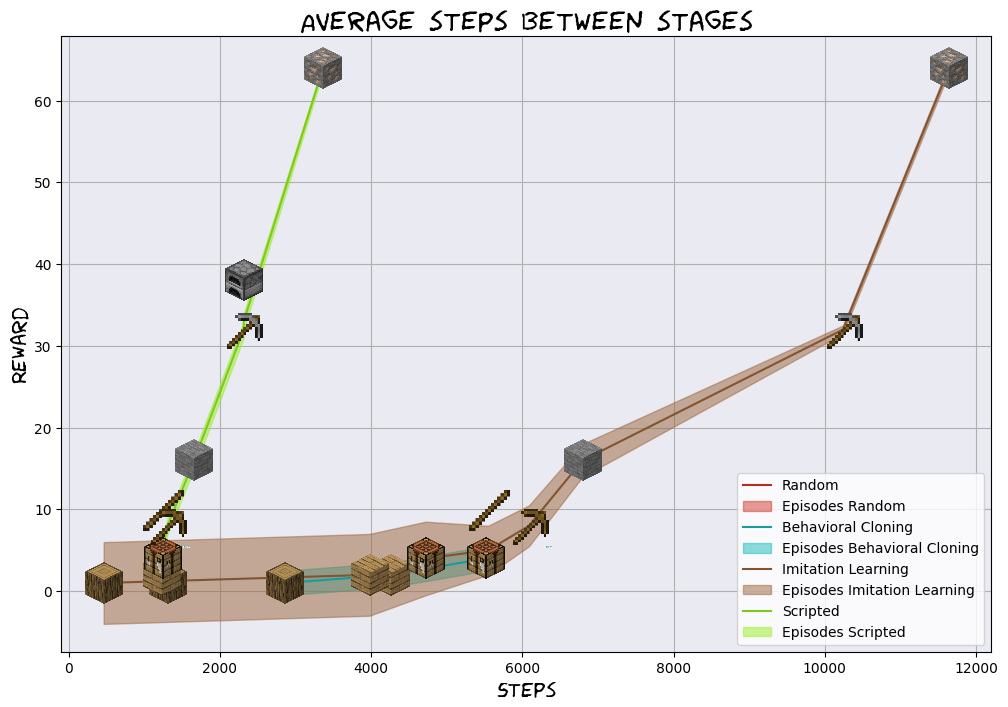

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(12,8))

# Data
for i, agent in enumerate([random_agent, bc_agent, imi_agent, scripted_agent]):
    rewards = {}
    x = []
    y = []
    agent_reward_step = agent['reward_at']
    for sublist in agent_reward_step:
        if sublist:
            prev_reward = 0
            for item in sublist:
                curr_reward = item[1]
                if prev_reward == item[1]:
                    curr_reward += 1
                if curr_reward in rewards:
                    rewards[curr_reward] = (rewards[curr_reward][0] + item[0], rewards[curr_reward][1] + 1) 
                else:
                    rewards[curr_reward] = (item[0], 1)
                prev_reward = curr_reward

    y_min, y_max = [], []

    for r, (sum_steps, num_r) in rewards.items():
        y.append(r)
        x.append(sum_steps / num_r)
        y_min.append(r-num_r/2)
        y_max.append(r+num_r/2)

    plt.plot(x, y, color=colors[i], label='Random' if i == 0 else 'Behavioral Cloning' if i == 1 else 'Imitation Learning' if i == 2 else 'Scripted')
    color_rgb = mcolors.hex2color(colors[i])  # Convert hexadecimal color to RGB tuple

    # Adjust brightness by multiplying each RGB component
    lighter_color_rgb = tuple(min(c * 1.2, 1.0) for c in color_rgb)

    # Adjust opacity by setting a lower alpha value
    lighter_color_rgba = lighter_color_rgb + (0.5,)  # Add an alpha value (e.g., 0.5 for semi-transparency)

    # Convert the adjusted colors back to hexadecimal notation if needed
    lighter_color_hex = mcolors.rgb2hex(lighter_color_rgb)
    lighter_color_hex_with_alpha = mcolors.rgb2hex(lighter_color_rgba)
    # Plot the shaded region between the min and max borders
    plt.fill_between(x, y_min, y_max, color=lighter_color_hex_with_alpha, alpha=0.5, label='Episodes ' + ('Random' if i == 0 else 'Behavioral Cloning' if i == 1 else 'Imitation Learning' if i == 2 else 'Scripted'))

    # Customize the plot
    plt.xlabel('Steps', fontproperties=font_prop, size=15)
    plt.ylabel('Reward', fontproperties=font_prop, size=15)
    # for j in range(len(y)):
    #     plt.text(x[j], y[j], str(y[j]), ha='center', va='bottom')
    plt.title('Average steps between stages', fontproperties=font_prop, size=20)
    plt.legend()
    if x:
        for idx in range(len(x)):
            image_box = OffsetImage(id2pic[y[idx]], zoom=0.1 if y[idx] != 32.0 else 0.2)
            ab = AnnotationBbox(image_box, (x[idx], y[idx] if y[idx] not in [5.0, 33.0] else y[idx] + 5), frameon=False)
            ax.add_artist(ab)

ax.set_facecolor('#EAEAF2')
ax.grid(True)
ax.set_axisbelow(True)

plt.show()

In [ ]:
def return_index_plot(agent):
    rewards = {}
    x = []
    y = []
    agent_reward_step = agent['reward_at']
    for sublist in agent_reward_step:
        if sublist:
            prev_reward = 0
            for item in sublist:
                curr_reward = item[1]
                if prev_reward == item[1]:
                    curr_reward += 1
                if curr_reward in rewards:
                    rewards[curr_reward] = (rewards[curr_reward][0] + item[0], rewards[curr_reward][1] + 1) 
                else:
                    rewards[curr_reward] = (item[0], 1)
                prev_reward = curr_reward

    y_min, y_max = [], []

    for r, (sum_steps, num_r) in rewards.items():
        y.append(r)
        x.append(sum_steps / num_r)
        y_min.append(r-num_r/2)
        y_max.append(r+num_r/2)
    return((x,y),(y_min,y_max))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.colors as mcolors

def create_frame(t,x,y,y_min,y_max,id,i_agent,t_x,t_y):
    i=i_agent
    fig, ax = plt.subplots(figsize=(12,8))
    # Data
   
    plt.plot(x[:(t+1)], y[:(t+1)], color=colors[i], label='Random' if i == 0 else 'Behavioral Cloning' if i == 1 else 'Imitation Learning' if i == 2 else 'Scripted')
    color_rgb = mcolors.hex2color(colors[i])  # Convert hexadecimal color to RGB tuple

    # Adjust brightness by multiplying each RGB component
    lighter_color_rgb = tuple(min(c * 1.2, 1.0) for c in color_rgb)

    # Adjust opacity by setting a lower alpha value
    lighter_color_rgba = lighter_color_rgb + (0.5,)  # Add an alpha value (e.g., 0.5 for semi-transparency)

    # Convert the adjusted colors back to hexadecimal notation if needed
    lighter_color_hex = mcolors.rgb2hex(lighter_color_rgb)
    lighter_color_hex_with_alpha = mcolors.rgb2hex(lighter_color_rgba)
    # Plot the shaded region between the min and max borders
    plt.fill_between(x[:t+1], y_min[:t+1], y_max[:t+1], color=lighter_color_hex_with_alpha, alpha=0.5, label='Episodes ' + ('Random' if i == 0 else 'Behavioral Cloning' if i == 1 else 'Imitation Learning' if i == 2 else 'Scripted'))

    # Customize the plot
    plt.xlabel('Steps')
    plt.ylabel('Reward')

    plt.xticks(t_x)
    plt.yticks(t_y)


    # for j in range(len(y)):
    #     plt.text(x[j], y[j], str(y[j]), ha='center', va='bottom')
    plt.title('Average steps between stages')
    plt.legend()
    if x:
        for idx in range(len(x[:t+1])):
            image_box = OffsetImage(id2pic[y[idx]], zoom=0.1 if y[idx] != 32.0 else 0.2)
            ab = AnnotationBbox(image_box, (x[idx], y[idx] if y[idx] not in [5.0, 33.0] else y[idx] + 5), frameon=False)
            ax.add_artist(ab)
    plt.savefig(f"./img/img_{id}.png",transparent=False,facecolor="white")

    plt.close()

In [ ]:
all_x=[]
all_y=[]

for i, agent in enumerate([random_agent, bc_agent, imi_agent, scripted_agent]):
    (x,y),_=return_index_plot(agent)
    all_x.extend(x)
    all_y.extend(y)
    
all_x=np.unique(all_x)
all_y=np.unique(all_y)
all_x.sort()
all_y.sort()

In [ ]:
!rm -rf img
!mkdir img

idx=0
ids=[]
for i, agent in enumerate([random_agent, bc_agent, imi_agent, scripted_agent]):
    (x,y),(y_min,y_max)=return_index_plot(agent)
    times=list(range(len(x)))
    for t in times:
        ids.append(idx)
        create_frame(t,x,y,y_min,y_max,idx,i,np.linspace(0,14000,8),np.linspace(0,80,9))
        idx+=1



import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(12,8))
# Data
for i, agent in enumerate([random_agent, bc_agent, imi_agent, scripted_agent]):
    rewards = {}
    x = []
    y = []
    agent_reward_step = agent['reward_at']
    for sublist in agent_reward_step:
        if sublist:
            prev_reward = 0
            for item in sublist:
                curr_reward = item[1]
                if prev_reward == item[1]:
                    curr_reward += 1
                if curr_reward in rewards:
                    rewards[curr_reward] = (rewards[curr_reward][0] + item[0], rewards[curr_reward][1] + 1) 
                else:
                    rewards[curr_reward] = (item[0], 1)
                prev_reward = curr_reward

    y_min, y_max = [], []

    for r, (sum_steps, num_r) in rewards.items():
        y.append(r)
        x.append(sum_steps / num_r)
        y_min.append(r-num_r/2)
        y_max.append(r+num_r/2)

    plt.plot(x, y, color=colors[i], label='Random' if i == 0 else 'Behavioral Cloning' if i == 1 else 'Imitation Learning' if i == 2 else 'Scripted')
    color_rgb = mcolors.hex2color(colors[i])  # Convert hexadecimal color to RGB tuple

    # Adjust brightness by multiplying each RGB component
    lighter_color_rgb = tuple(min(c * 1.2, 1.0) for c in color_rgb)

    # Adjust opacity by setting a lower alpha value
    lighter_color_rgba = lighter_color_rgb + (0.5,)  # Add an alpha value (e.g., 0.5 for semi-transparency)

    # Convert the adjusted colors back to hexadecimal notation if needed
    lighter_color_hex = mcolors.rgb2hex(lighter_color_rgb)
    lighter_color_hex_with_alpha = mcolors.rgb2hex(lighter_color_rgba)
    # Plot the shaded region between the min and max borders
    plt.fill_between(x, y_min, y_max, color=lighter_color_hex_with_alpha, alpha=0.5, label='Episodes ' + ('Random' if i == 0 else 'Behavioral Cloning' if i == 1 else 'Imitation Learning' if i == 2 else 'Scripted'))

    # Customize the plot
    plt.xlabel('Steps')
    plt.ylabel('Reward')

    plt.xticks(np.linspace(0,14000,8))
    plt.yticks(np.linspace(0,80,9))
    # for j in range(len(y)):
    #     plt.text(x[j], y[j], str(y[j]), ha='center', va='bottom')
    plt.title('Average steps between stages')
    plt.legend()
    if x:
        for idx2 in range(len(x)):
            image_box = OffsetImage(id2pic[y[idx2]], zoom=0.1 if y[idx2] != 32.0 else 0.2)
            ab = AnnotationBbox(image_box, (x[idx2], y[idx2] if y[idx2] not in [5.0, 33.0] else y[idx2] + 5), frameon=False)
            ax.add_artist(ab)
for i in range(21):
    plt.savefig(f"./img/img_{idx}.png",transparent=False,facecolor="white")
    ids.append(idx)
    idx+=1
plt.close()


In [ ]:
import imageio
frames=[]
for i in ids:
    image=imageio.v2.imread(f"./img/img_{i}.png")
    frames.append(image)
imageio.mimsave("./avg.gif",frames,fps=3)

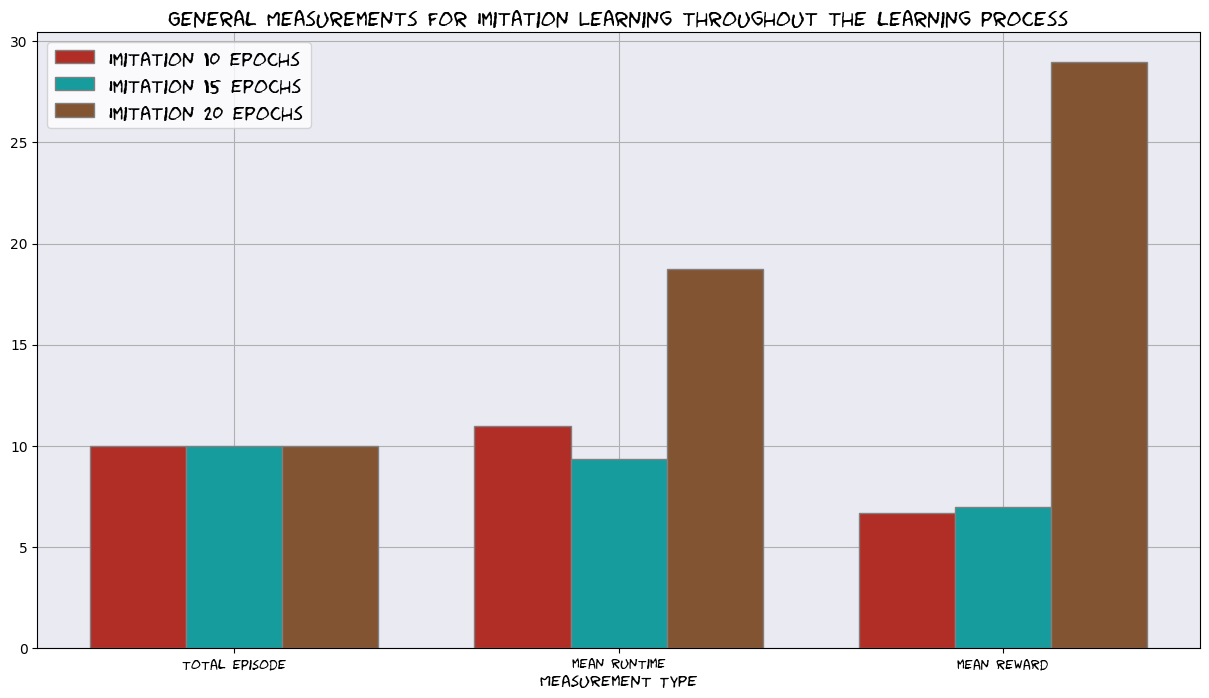

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

imitation_agent_10 = load_json('/content/drive/MyDrive/minecraft proj/For comparison/stats_imi_10.json')
imitation_agent_15 = load_json('/content/drive/MyDrive/minecraft proj/For comparison/stats_imi_15.json')

# set width of bar
barWidth = 0.25
fig, ax = plt.subplots(figsize =(15, 8))

# set height of bar
imi_10_stats = [np.mean(imitation_agent_10[i]) for i in ['episode', 'runtime','reward']]
imi_15_stats = [np.mean(imitation_agent_15[i]) for i in ['episode', 'runtime','reward']]
imi_stats = [np.mean(imi_agent[i]) for i in ['episode', 'runtime','reward']]

# Set position of bar on X axis
br1 = np.arange(len(random_stats))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, imi_10_stats, color=colors[0], width = barWidth,
		edgecolor ='grey', label ='Imitation 10 epochs')
plt.bar(br2, imi_15_stats, color=colors[1], width = barWidth,
		edgecolor ='grey', label ='Imitation 15 epochs')
plt.bar(br3, imi_stats, color =colors[2], width = barWidth,
		edgecolor ='grey', label ='Imitation 20 epochs')

# Adding Xticks
plt.title('General Measurements For Imitation Learning throughout the learning process', fontproperties=font_prop, size=15)

plt.xlabel('Measurement Type', fontproperties=font_prop, size=12)
plt.xticks([r + barWidth for r in range(len(random_stats))],
		['total episode', 'mean runtime', 'mean reward'], fontproperties=font_prop, size=10)

plt.legend(prop=legend_font_prop)

ax.set_facecolor('#EAEAF2')
ax.grid(True)
ax.set_axisbelow(True)

plt.show()


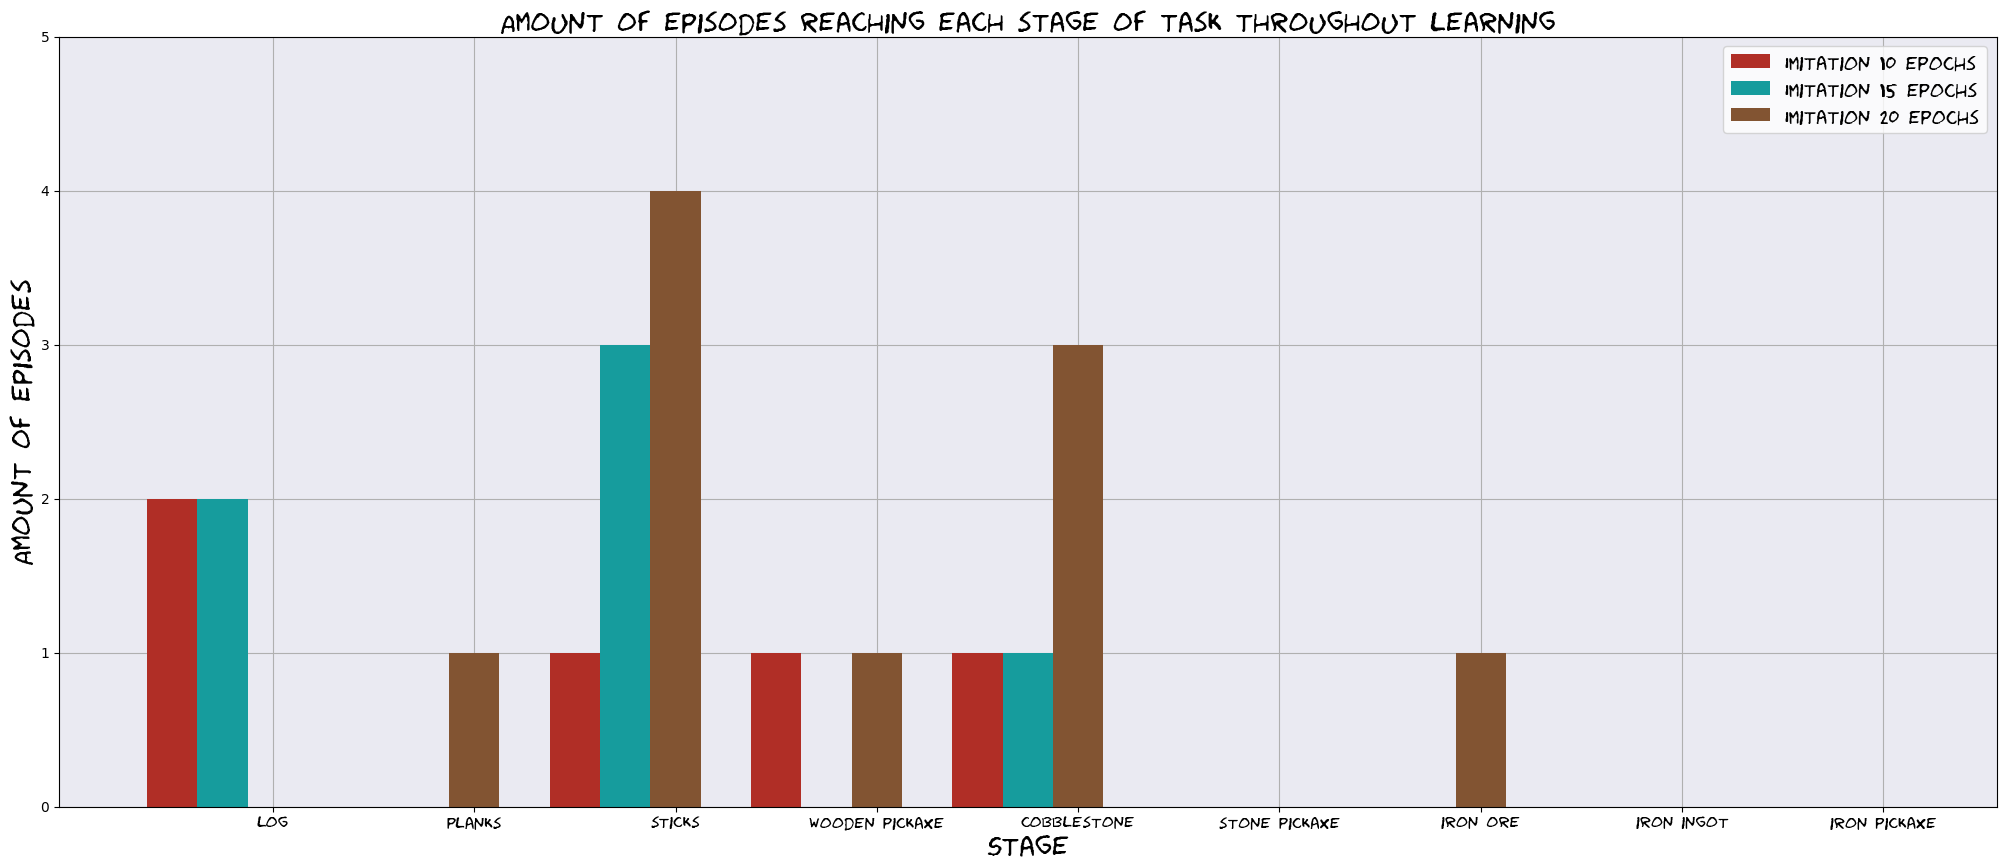

In [ ]:
from collections import Counter
barWidth = 0.25
x = np.array([1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0])
fix, ax = plt.subplots(figsize=(25,10))
for i, agent in enumerate([imitation_agent_10, imitation_agent_15, imi_agent]):
    agent_reward_step = agent['reward_at']
    c=Counter()
    # Iterate over each sublist in the given data
    for sublist in agent_reward_step:
        if sublist:
            c[sublist[-1][1]]+=1
        
    y=[c[i] for i in x]

# Plot the bar chart with colors based on the normalized reward values
    x_offset = i * barWidth
    plt.bar(np.arange(len(x)) + x_offset, y, color=colors[i], width=barWidth, label='Imitation 10 epochs' if i == 0 else 'Imitation 15 epochs' if i == 1 else 'Imitation 20 epochs')

plt.xlabel('Stage', fontproperties=font_prop, size=20)
plt.ylabel('Amount of episodes', fontproperties=font_prop, size=20)
plt.title('Amount of episodes reaching each stage of task throughout learning', fontproperties=font_prop, size=20)
plt.xticks(np.arange(len(x)) + 2*barWidth, ['log', 'planks', 'sticks', 'wooden pickaxe', 'cobblestone', 'stone pickaxe', 'iron ore', 'iron ingot', 'iron pickaxe'], fontproperties=font_prop, size=12)
plt.yticks(np.arange(6.0))
plt.legend(prop=legend_font_prop)

ax.set_facecolor('#EAEAF2')
ax.grid(True)
ax.set_axisbelow(True)

plt.show()

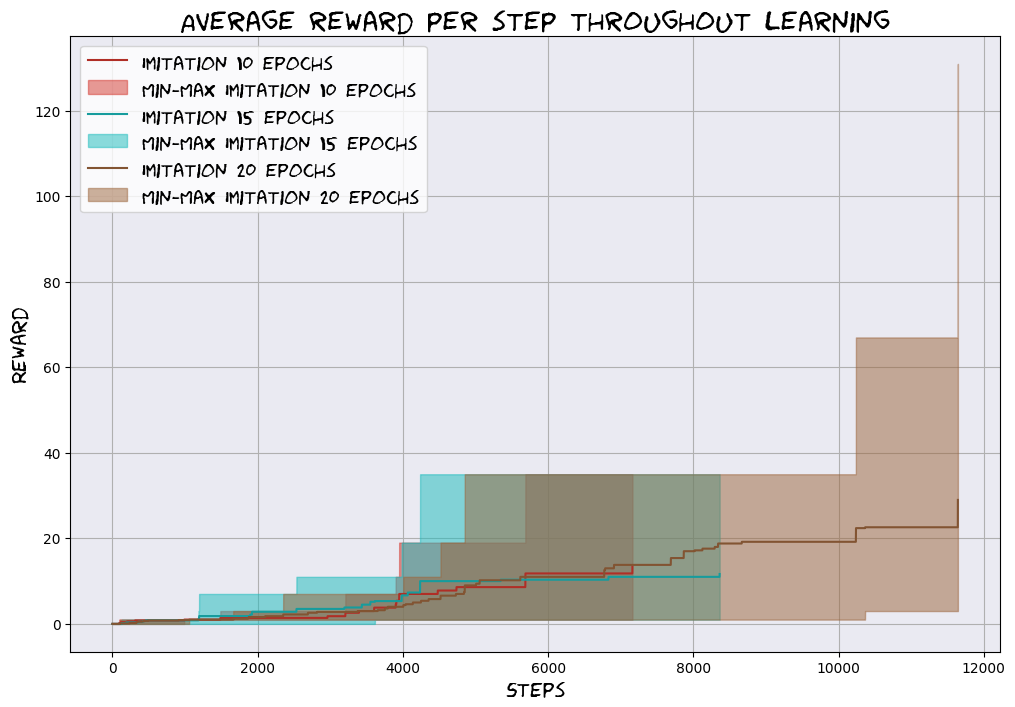

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.colors as mcolors


fig, ax = plt.subplots(figsize=(12,8))
# Data
for i, agent in enumerate([imitation_agent_10, imitation_agent_15, imi_agent]):
    x_values, y_values = [], []
    cumulative = []
    agent_reward_step = agent['reward_at']
    for sublist in agent_reward_step:
        if sublist:
            scripted_reward_step_array = np.array(sublist).reshape(-1, 2)

            # Calculate the cumulative sum of the second column
            scripted_reward_step_array[:, 1] = np.cumsum(scripted_reward_step_array[:, 1])

            cumulative.append(scripted_reward_step_array.tolist())

            x_values.extend([item[0] for item in sublist])
            y_values.extend([item[1] for item in sublist])

    min_x = np.min(x_values)
    max_x = np.max(x_values)
    xy = []
    for tier2 in cumulative:
        filled_data = []
        previous_x = None
        for x, y in tier2:
            if previous_x is None:
                # Add missing x values before the first data point
                if x > 0:
                    filled_data.extend([[i, 0.0] for i in range(0, int(x))])
            else:
                # Add missing x values between the previous and current data point
                if x - previous_x > 1:
                    filled_data.extend([[i, previous_y] for i in range(int(previous_x) + 1, int(x))])

            filled_data.append([x, y])
            previous_x = x
            previous_y = y

        # Add missing x values after the last data point
        max_xi = filled_data[-1][0]
        filled_data.extend([[i, filled_data[-1][1]] for i in range(int(max_xi) + 1, max_x + 1)])
        xy.append(filled_data)

    x_values = range(max_x + 1)

    y_values = [[sublist[idx][1] for idx in range(len(x_values))] for sublist in xy]
    data_array = np.array(y_values, ndmin=2)


    # Find the mean of each index
    mean_of_each_index = np.mean(data_array, axis=0)

    # Find the min of each index
    min_of_each_index = np.min(data_array, axis=0)

    # Find the max of each index
    max_of_each_index = np.max(data_array, axis=0)


    plt.plot(x_values, mean_of_each_index, color=colors[i], label='Imitation 10 epochs' if i == 0 else 'Imitation 15 epochs' if i == 1 else 'Imitation 20 epochs')
    color_rgb = mcolors.hex2color(colors[i])  # Convert hexadecimal color to RGB tuple

    # Adjust brightness by multiplying each RGB component
    lighter_color_rgb = tuple(min(c * 1.2, 1.0) for c in color_rgb)

    # Adjust opacity by setting a lower alpha value
    lighter_color_rgba = lighter_color_rgb + (0.5,)  # Add an alpha value (e.g., 0.5 for semi-transparency)

    # Convert the adjusted colors back to hexadecimal notation if needed
    lighter_color_hex = mcolors.rgb2hex(lighter_color_rgb)
    lighter_color_hex_with_alpha = mcolors.rgb2hex(lighter_color_rgba)
    # Plot the shaded region between the min and max borders
    plt.fill_between(x_values, min_of_each_index, max_of_each_index, color=lighter_color_hex_with_alpha, alpha=0.5, label='Min-Max ' + ('Imitation 10 epochs' if i == 0 else 'Imitation 15 epochs' if i == 1 else 'Imitation 20 epochs'))

    # Customize the plot
    plt.xlabel('Steps', fontproperties=font_prop, size=15)
    plt.ylabel('Reward', fontproperties=font_prop, size=15)
    plt.title('Average reward per step throughout learning', fontproperties=font_prop, size=20)
    plt.legend(loc='upper left', prop=legend_font_prop)

ax.set_facecolor('#EAEAF2')
ax.grid(True)
ax.set_axisbelow(True)

plt.show()

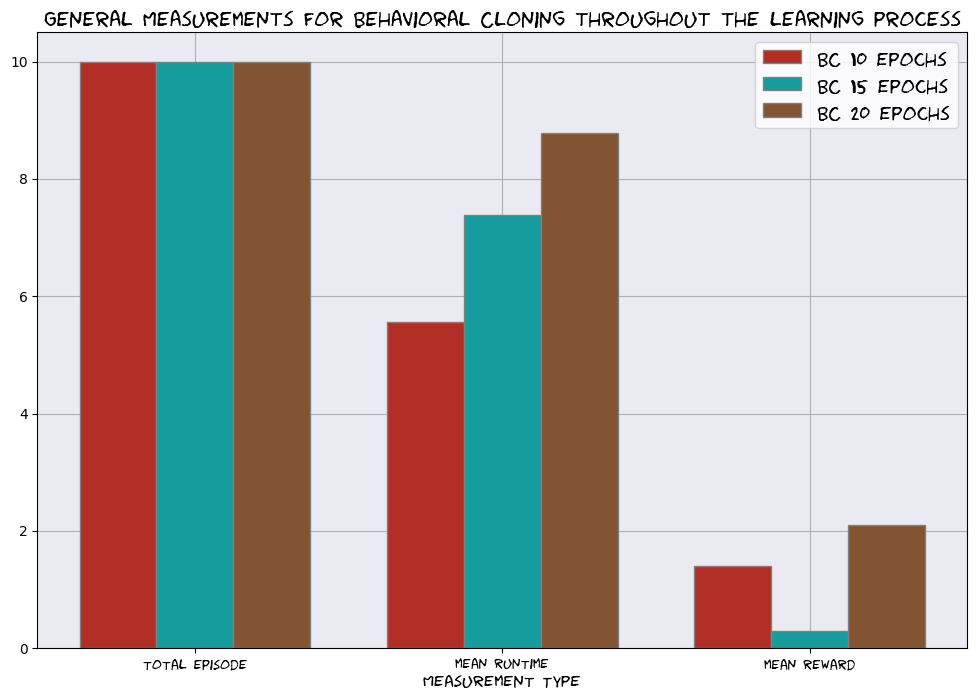

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bc_agent_10 = load_json('/content/drive/MyDrive/minecraft proj/For comparison/basic_bc_10.json')
bc_agent_15 = load_json('/content/drive/MyDrive/minecraft proj/For comparison/basic_bc_15.json')

# set width of bar
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
bc_10_stats = [np.mean(bc_agent_10[i]) for i in ['episode', 'runtime','reward']]
bc_15_stats = [np.mean(bc_agent_15[i]) for i in ['episode', 'runtime','reward']]
bc_stats = [np.mean(bc_agent[i]) for i in ['episode', 'runtime','reward']]

# Set position of bar on X axis
br1 = np.arange(len(random_stats))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, bc_10_stats, color=colors[0], width = barWidth,
		edgecolor ='grey', label ='BC 10 epochs')
plt.bar(br2, bc_15_stats, color=colors[1], width = barWidth,
		edgecolor ='grey', label ='BC 15 epochs')
plt.bar(br3, bc_stats, color =colors[2], width = barWidth,
		edgecolor ='grey', label ='BC 20 epochs')

# Adding Xticks
plt.title('General Measurements For Behavioral Cloning throughout the learning process', fontproperties=font_prop, size=15)

plt.xlabel('Measurement Type', fontproperties=font_prop, size=12)
plt.xticks([r + barWidth for r in range(len(random_stats))],
		['total episode', 'mean runtime', 'mean reward'], fontproperties=font_prop, size=10)

plt.legend(prop=legend_font_prop)

ax.set_facecolor('#EAEAF2')
ax.grid(True)
ax.set_axisbelow(True)

plt.show()

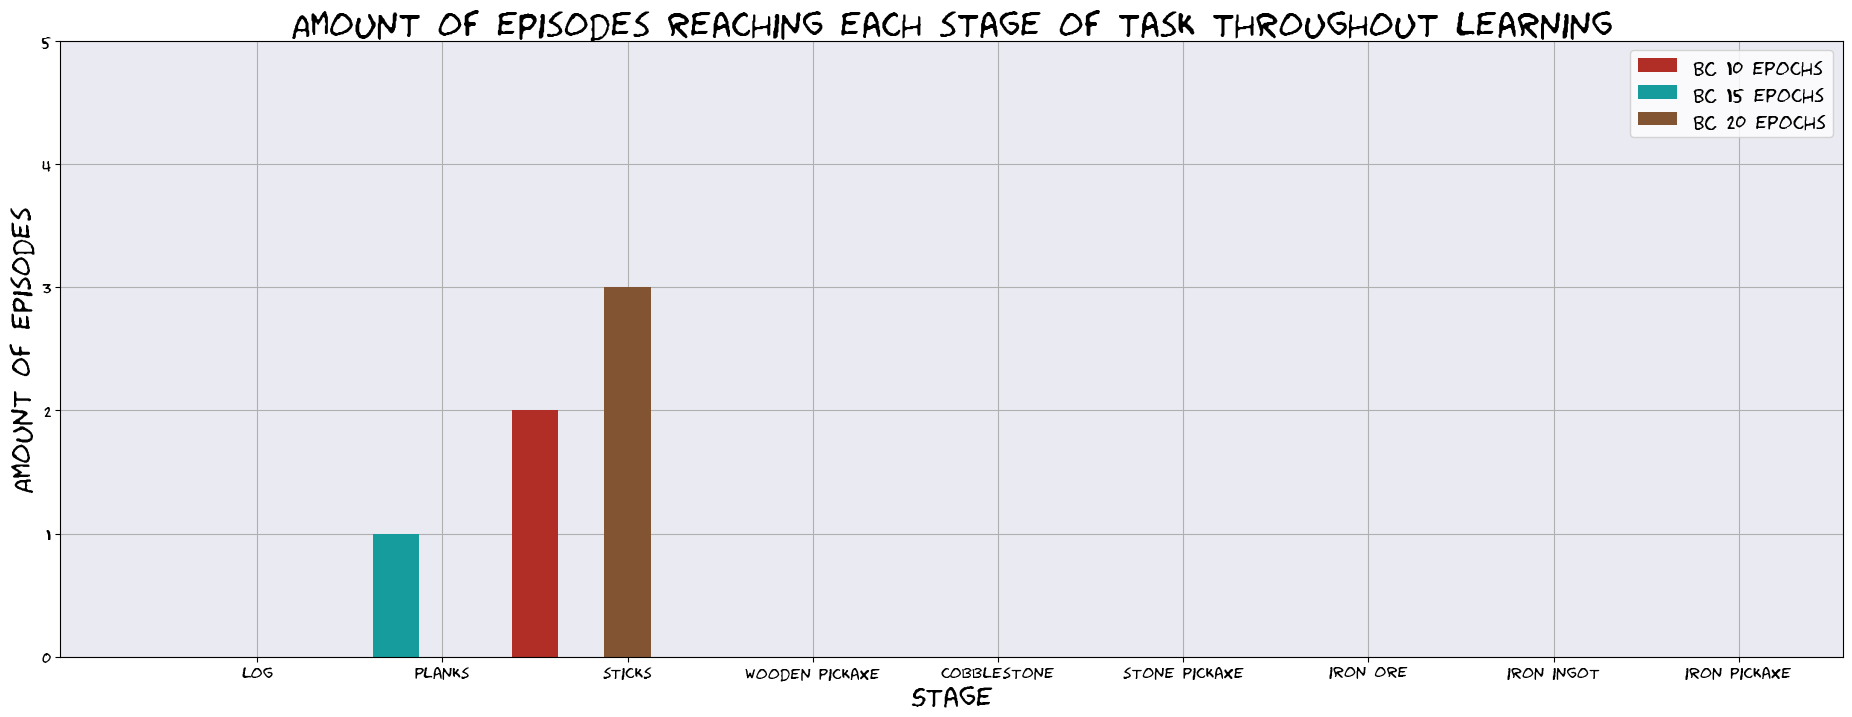

In [ ]:
from collections import Counter
barWidth = 0.25
x = np.array([1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0])
fig, ax = plt.subplots(figsize=(23,8))

for i, agent in enumerate([bc_agent_10, bc_agent_15, bc_agent]):
    agent_reward_step = agent['reward_at']
    c=Counter()
    # Iterate over each sublist in the given data
    for sublist in agent_reward_step:
        if sublist:
            c[sublist[-1][1]]+=1
        
    y=[c[i] for i in x]

# Plot the bar chart with colors based on the normalized reward values
    x_offset = i * barWidth
    plt.bar(np.arange(len(x)) + x_offset, y, color=colors[i], width=barWidth, label='BC 10 epochs' if i == 0 else 'BC 15 epochs' if i == 1 else 'BC 20 epochs')

plt.xlabel('Stage', fontproperties=font_prop, size=20)
plt.ylabel('Amount of episodes', fontproperties=font_prop, size=20)
plt.title('Amount of episodes reaching each stage of task throughout learning', fontproperties=font_prop, size=25)
plt.xticks(np.arange(len(x)) + 2*barWidth, ['log', 'planks', 'sticks', 'wooden pickaxe', 'cobblestone', 'stone pickaxe', 'iron ore', 'iron ingot', 'iron pickaxe'], fontproperties=font_prop, size=12)
plt.yticks(np.arange(6.0), fontproperties=font_prop, size=12)
plt.legend(prop=legend_font_prop)

ax.set_facecolor('#EAEAF2')
ax.grid(True)
ax.set_axisbelow(True)

plt.show()

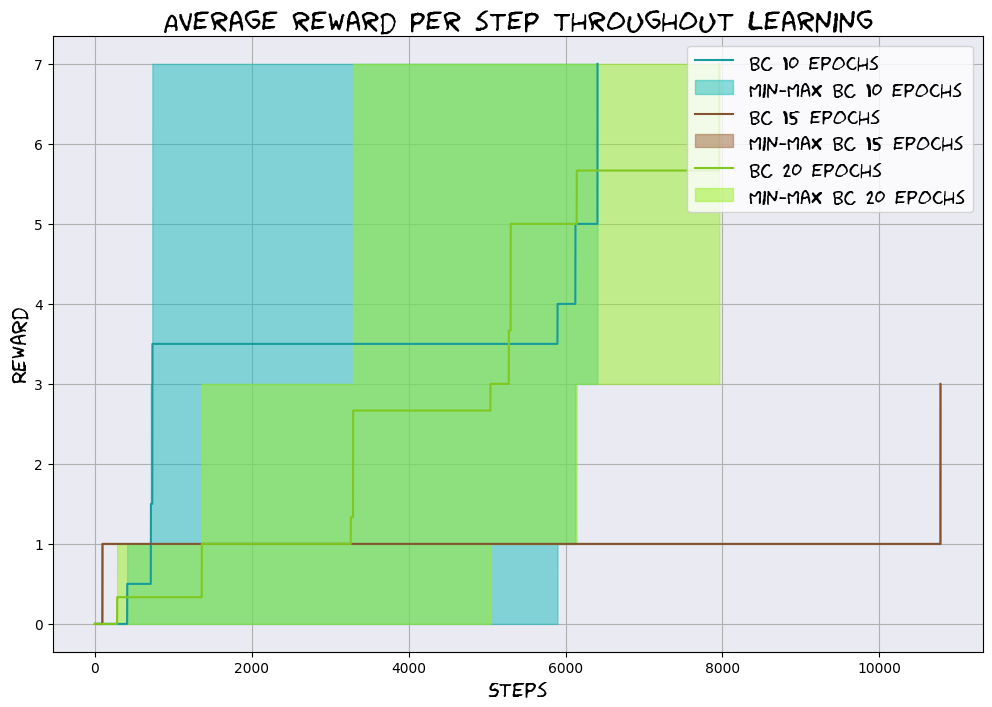

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.colors as mcolors

fix, ax = plt.subplots(figsize=(12,8))
# Data
for i, agent in enumerate([bc_agent_10, bc_agent_15, bc_agent]):
    x_values, y_values = [], []
    cumulative = []
    agent_reward_step = agent['reward_at']
    for sublist in agent_reward_step:
        if sublist:
            scripted_reward_step_array = np.array(sublist).reshape(-1, 2)

            # Calculate the cumulative sum of the second column
            scripted_reward_step_array[:, 1] = np.cumsum(scripted_reward_step_array[:, 1])

            cumulative.append(scripted_reward_step_array.tolist())

            x_values.extend([item[0] for item in sublist])
            y_values.extend([item[1] for item in sublist])

    min_x = np.min(x_values)
    max_x = np.max(x_values)
    xy = []

    for tier2 in cumulative:
        filled_data = []
        previous_x = None
        for x, y in tier2:
            if previous_x is None:
                # Add missing x values before the first data point
                if x > 0:
                    filled_data.extend([[i, 0.0] for i in range(0, int(x))])
            else:
                # Add missing x values between the previous and current data point
                if x - previous_x > 1:
                    filled_data.extend([[i, previous_y] for i in range(int(previous_x) + 1, int(x))])

            filled_data.append([x, y])
            previous_x = x
            previous_y = y

        # Add missing x values after the last data point
        max_xi = filled_data[-1][0]
        filled_data.extend([[i, filled_data[-1][1]] for i in range(int(max_xi) + 1, max_x + 1)])
        xy.append(filled_data)

    x_values = range(max_x + 1)

    y_values = [[sublist[idx][1] for idx in range(len(x_values))] for sublist in xy]
    data_array = np.array(y_values, ndmin=2)


    # Find the mean of each index
    mean_of_each_index = np.mean(data_array, axis=0)

    # Find the min of each index
    min_of_each_index = np.min(data_array, axis=0)

    # Find the max of each index
    max_of_each_index = np.max(data_array, axis=0)


    plt.plot(x_values, mean_of_each_index, color=colors[i+1], label='BC 10 epochs' if i == 0 else 'BC 15 epochs' if i == 1 else 'BC 20 epochs')
    color_rgb = mcolors.hex2color(colors[i+1])  # Convert hexadecimal color to RGB tuple

    # Adjust brightness by multiplying each RGB component
    lighter_color_rgb = tuple(min(c * 1.2, 1.0) for c in color_rgb)

    # Adjust opacity by setting a lower alpha value
    lighter_color_rgba = lighter_color_rgb + (0.5,)  # Add an alpha value (e.g., 0.5 for semi-transparency)

    # Convert the adjusted colors back to hexadecimal notation if needed
    lighter_color_hex = mcolors.rgb2hex(lighter_color_rgb)
    lighter_color_hex_with_alpha = mcolors.rgb2hex(lighter_color_rgba)
    # Plot the shaded region between the min and max borders
    plt.fill_between(x_values, min_of_each_index, max_of_each_index, color=lighter_color_hex_with_alpha, alpha=0.5, label='Min-Max ' + ('BC 10 epochs' if i == 0 else 'BC 15 epochs' if i == 1 else 'BC 20 epochs'))

    plt.xlabel('Steps', fontproperties=font_prop, size=15)
    plt.ylabel('Reward', fontproperties=font_prop, size=15)
    plt.title('Average reward per step throughout learning', fontproperties=font_prop, size=20)
    plt.legend(loc='upper right', prop=legend_font_prop)

ax.set_facecolor('#EAEAF2')
ax.grid(True)
ax.set_axisbelow(True)

plt.show()
